# **Proyek Machine Learning: Rock Paper Scissors**
### benzodiahmad@dicoding.org
**Ahmad Attoriq**

1.   Machine Learning
2.   Python

### Dicoding Academy batch 5

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=5ac25ba2be32d29559136f209250357b770621bcc81af115e515decc871156da
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import numpy as np
import wget
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
# from keras.losses import CategoricalCrossentropy
from IPython.display import Image
from google.colab import files

In [ ]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
wget.download(url, 'rockpaperscissors.zip')

with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/rockpaperscissors/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/dataset/rockpaperscissors/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    AveragePooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # Conv2D(256, (3,3), activation='relu'),
    # AveragePooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 111, 111, 32)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 54, 54, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 average_pooling2d_2 (Avera  (None, 26, 26, 64)        0

In [ ]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, mode='max', verbose=1)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=10,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=100,
    verbose=1
    # callbacks=[early_stopping]
)

Epoch 1/100
10/10 [==============================] - 56s 6s/step - loss: 1.0858 - accuracy: 0.3781 - val_loss: 1.0649 - val_accuracy: 0.4031
Epoch 2/100
10/10 [==============================] - 52s 5s/step - loss: 1.0380 - accuracy: 0.4594 - val_loss: 1.0098 - val_accuracy: 0.5469
Epoch 3/100
10/10 [==============================] - 51s 5s/step - loss: 1.0364 - accuracy: 0.4594 - val_loss: 0.9469 - val_accuracy: 0.6719
Epoch 4/100
10/10 [==============================] - 52s 5s/step - loss: 1.0024 - accuracy: 0.5219 - val_loss: 0.9392 - val_accuracy: 0.6562
Epoch 5/100
10/10 [==============================] - 52s 6s/step - loss: 0.9723 - accuracy: 0.5034 - val_loss: 0.9109 - val_accuracy: 0.6219
Epoch 6/100
10/10 [==============================] - 51s 5s/step - loss: 0.9021 - accuracy: 0.6000 - val_loss: 0.9298 - val_accuracy: 0.5250
Epoch 7/100
10/10 [==============================] - 45s 5s/step - loss: 0.9293 - accuracy: 0.5813 - val_loss: 0.8701 - val_accuracy: 0.6438
Epoch 8/100
1

In [ ]:
model.evaluate(validation_generator)

28/28 [==============================] - 36s 1s/step - loss: 0.3342 - accuracy: 0.8879


[0.3342211842536926, 0.8878718614578247]

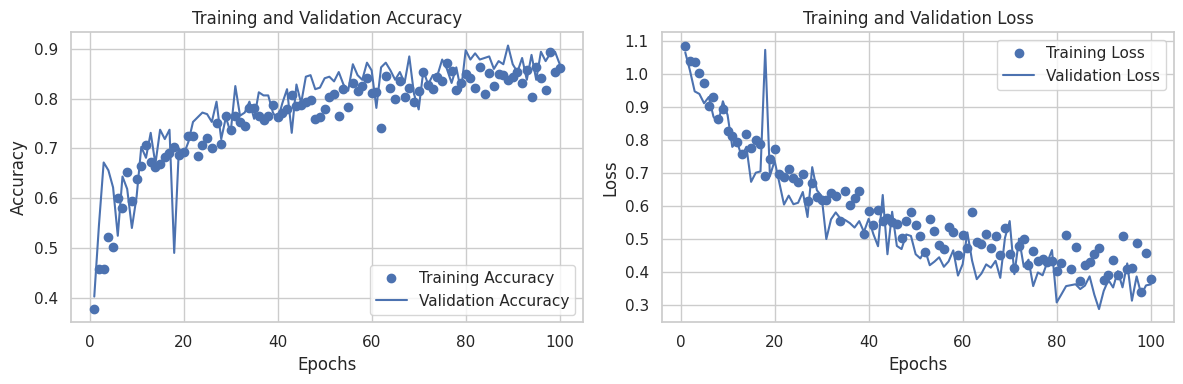

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

sns.set(style='whitegrid')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    result = model.predict(img)
    class_index = np.argmax(result)

    return class_index

Saving WhatsApp Image 2023-11-20 at 21.52.20.jpeg to WhatsApp Image 2023-11-20 at 21.52.20.jpeg
1/1 [==============================] - 0s 441ms/step
Gambar adalah kertas


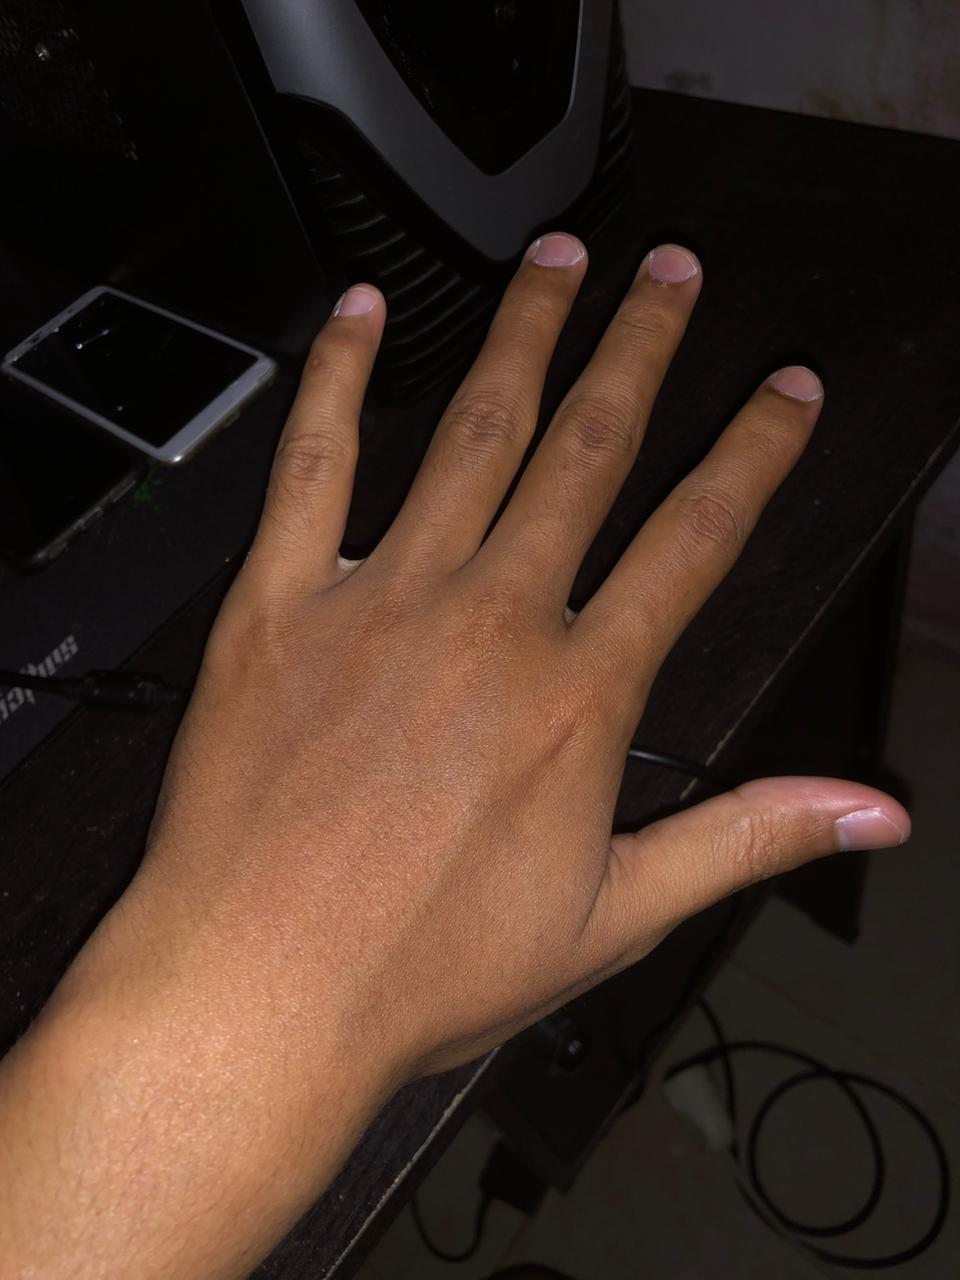

In [24]:
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    class_index = predict_uploaded_image(model, img_path)

    if class_index == 0:
        print("Gambar adalah kertas")
    elif class_index == 1:
        print("Gambar adalah batu")
    else:
        print("Gambar adalah gunting")

    display(Image(img_path))